In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
pd.__version__

'1.4.4'

In [2]:
matplotlib.__file__

'/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/__init__.py'

In [3]:
[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf',
 '/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuS

In [4]:
matplotlib.__file__

'/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/__init__.py'

In [5]:
plt.rcParams["font.family"] = 'NanumGothicCoding'

https://hooni-playground.com/961/

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
#음수 표사
matplotlib.rc('axes', unicode_minus = False) 


# 한글 폰트 적용 : 맥
matplotlib.rc('font', family = 'AppleGothic')
plt.rc('font', family='AppleGothic')

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [10]:
df_raw = pd.read_csv("/home/piai/문서/1 Big Data 분석 기초/FITNESS_정제.csv", encoding = 'euc-kr')

In [11]:
df_raw.head()
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [12]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [13]:
df_raw['GENDER'].fillna("여성", inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [14]:
df_raw.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.426923
여성    72.908750
Name: WEIGHT, dtype: float64

In [15]:
df_raw['WEIGHT'] = df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform('mean')).round(3)

In [16]:
df_raw[['RUNTIME', 'RUNTIME_UNIT']] = df_raw['RUNTIME'].str.split(expand = True)
df_raw['RUNTIME'] = df_raw['RUNTIME'].astype('float64')

<Axes: >

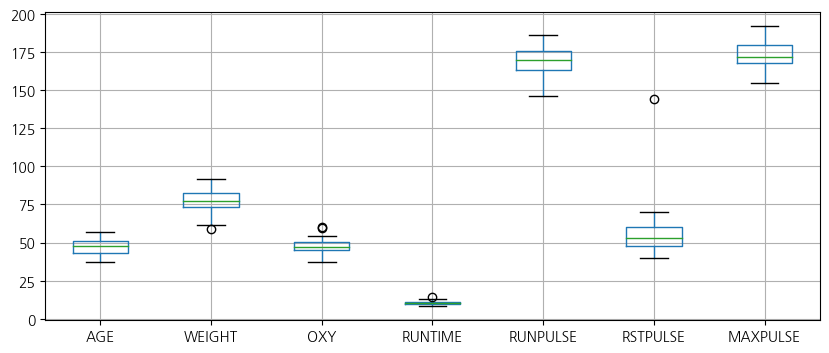

In [17]:
df_raw.boxplot(figsize = (10,4))

In [18]:
df_raw['RSTPULSE'] >= 100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176,1968-05-02,SEC
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176,1976-12-04,SEC


In [19]:
df_raw[(df_raw["RSTPULSE"] >= 100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC


In [21]:
df_fitness = df_raw[df_raw["RSTPULSE"] < 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [23]:
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [27]:
df_fitness["BIRTH"] = pd.to_datetime(df_fitness['BIRTH'], format='%Y-%m-%d')
df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
df_fitness['MONTH']= df_fitness['BIRTH'].dt.month
df_fitness['DAY'] = df_fitness['BIRTH'].dt.day
df_fitness['WEEKDAY'] = df_fitness['BIRTH'].dt.weekday
df_fitness.head()

/tmp/ipykernel_26950/2831559347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitness["BIRTH"] = pd.to_datetime(df_fitness['BIRTH'], format='%Y-%m-%d')
/tmp/ipykernel_26950/2831559347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
/tmp/ipykernel_26950/2831559347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT,YEAR,MONTH,DAY,WEEKDAY
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC,1976,4,5,0
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC,1986,9,6,5
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC,1978,4,7,4
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC,1966,8,8,0
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC,1977,2,9,2


In [28]:
df_fitness = df_fitness.drop(['NAME','BIRTH','RUNTIME_UNIT'], axis = 1)
df_fitness.head()

,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


In [29]:
df_fitness_dummy = pd.get_dummies(df_fitness, drop_first = True)
df_fitness_dummy.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976,4,5,0,1,1,0
1,38,81.870,60.055,8.63,170,48,186,1986,9,6,5,1,0,0
2,43,85.840,54.297,8.65,156,45,168,1978,4,7,4,1,1,0
3,50,70.870,54.625,8.92,146,48,155,1966,8,8,0,1,0,1
4,49,82.427,49.156,8.95,180,44,185,1977,2,9,2,0,1,0


In [30]:
df_scale_std = StandardScaler()
df_scale_std = df_scale_std.fit_transform(df_fitness_dummy)

In [33]:
df_scale_std = pd.DataFrame(df_scale_std, columns=df_fitness_dummy.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,-1.415684,0.935414,1.069045,-0.707107
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,1.082582,0.935414,-0.935414,-0.707107
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,0.582929,0.935414,1.069045,-0.707107
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,-1.415684,0.935414,-0.935414,1.414214
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,-0.416378,-1.069045,1.069045,-0.707107
